In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples # 评估指标：轮廓系数
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

#### 数据范围：2021/08/01-2022/07/31在RG成功付款的用户
#### 数据量：114852
#### 实际用到数据量：114857(剔除5个离群点)

In [2]:
r1=open('RFM_data/RFM_k-means取数_360_1.csv')
r2=open('RFM_data/RFM_k-means取数_360_2.csv')
rfm1=pd.read_csv(r1)
rfm2=pd.read_csv(r2)
rfm=pd.concat((rfm1,rfm2), axis=0)

In [3]:
rfm.head(20)

,user_id,Recency,Frequency,Monetary
0,19542306,42,176,12856.79
1,20489490,4,84,8347.63
2,21839121,54,59,7032.09
3,10402254,1,54,4920.59
4,20172770,2,45,4867.34
5,21966276,7,18,4497.85
6,20583030,3,39,4468.95
7,7808288,101,103,4314.86
8,9439233,3,25,3960.09
9,16729361,22,25,3959.60


In [4]:
#可以看到阈值取分位数和均值的差异程度
rfm.describe() #各字段统计信息

,user_id,Recency,Frequency,Monetary
count,1.148520e+05,114852.000000,114852.000000,114852.000000
mean,1.899346e+07,155.412792,1.407316,107.555560
std,5.009870e+06,107.726013,1.371132,136.393973
min,7.638000e+03,0.000000,1.000000,7.780000
25%,1.826422e+07,62.000000,1.000000,44.480000
50%,2.187334e+07,126.000000,1.000000,71.325000
75%,2.207148e+07,254.000000,1.000000,123.360000
max,2.223546e+07,364.000000,176.000000,12856.790000


C:\Users\Administrator.sf-202111191756\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Administrator.sf-202111191756\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Administrator.sf-202111191756\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


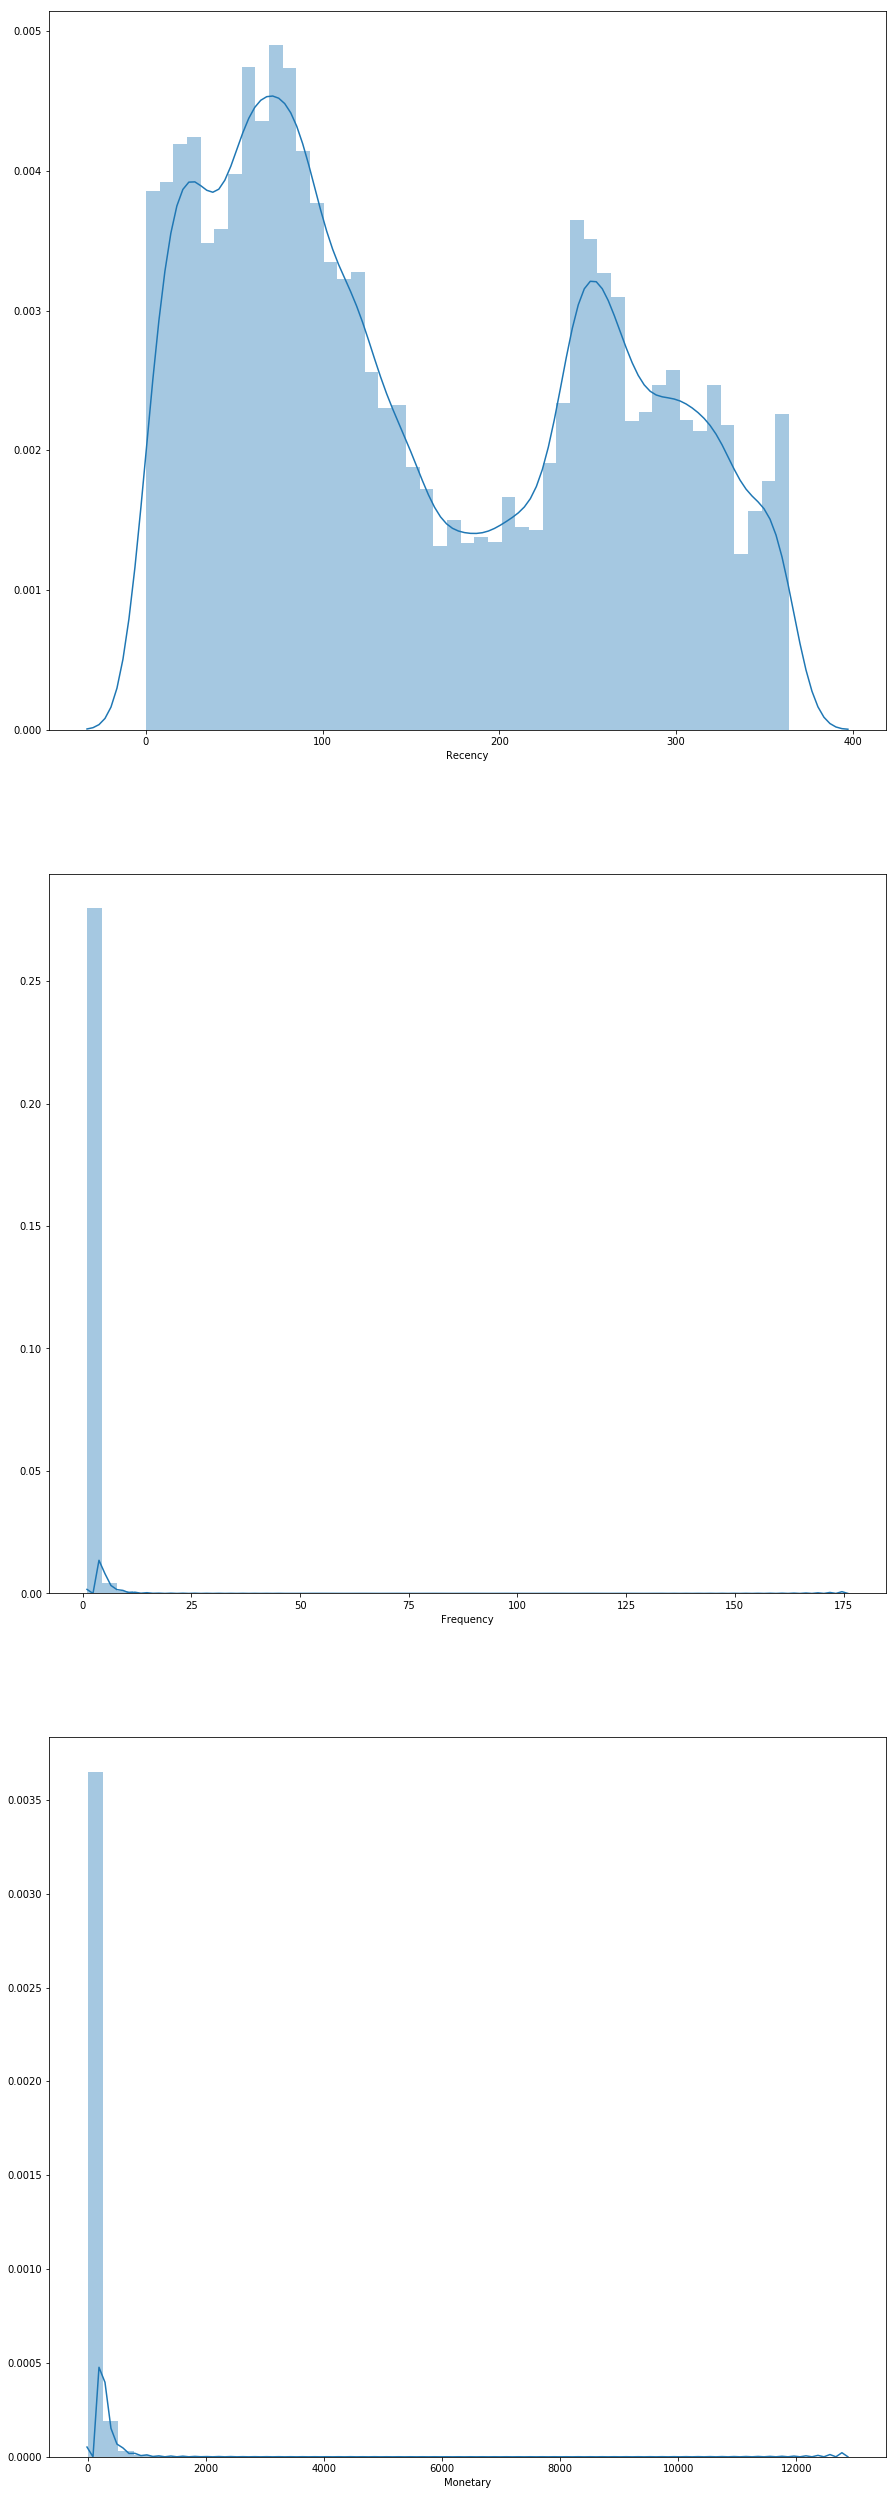

In [104]:
#各变量直方分布图
fig, ax=plt.subplots(3,1)
fig.set_size_inches(15,45)
sns.distplot(rfm['Recency'], ax=ax[0])
sns.distplot(rfm['Frequency'], ax=ax[1])
sns.distplot(rfm['Monetary'], ax=ax[2])

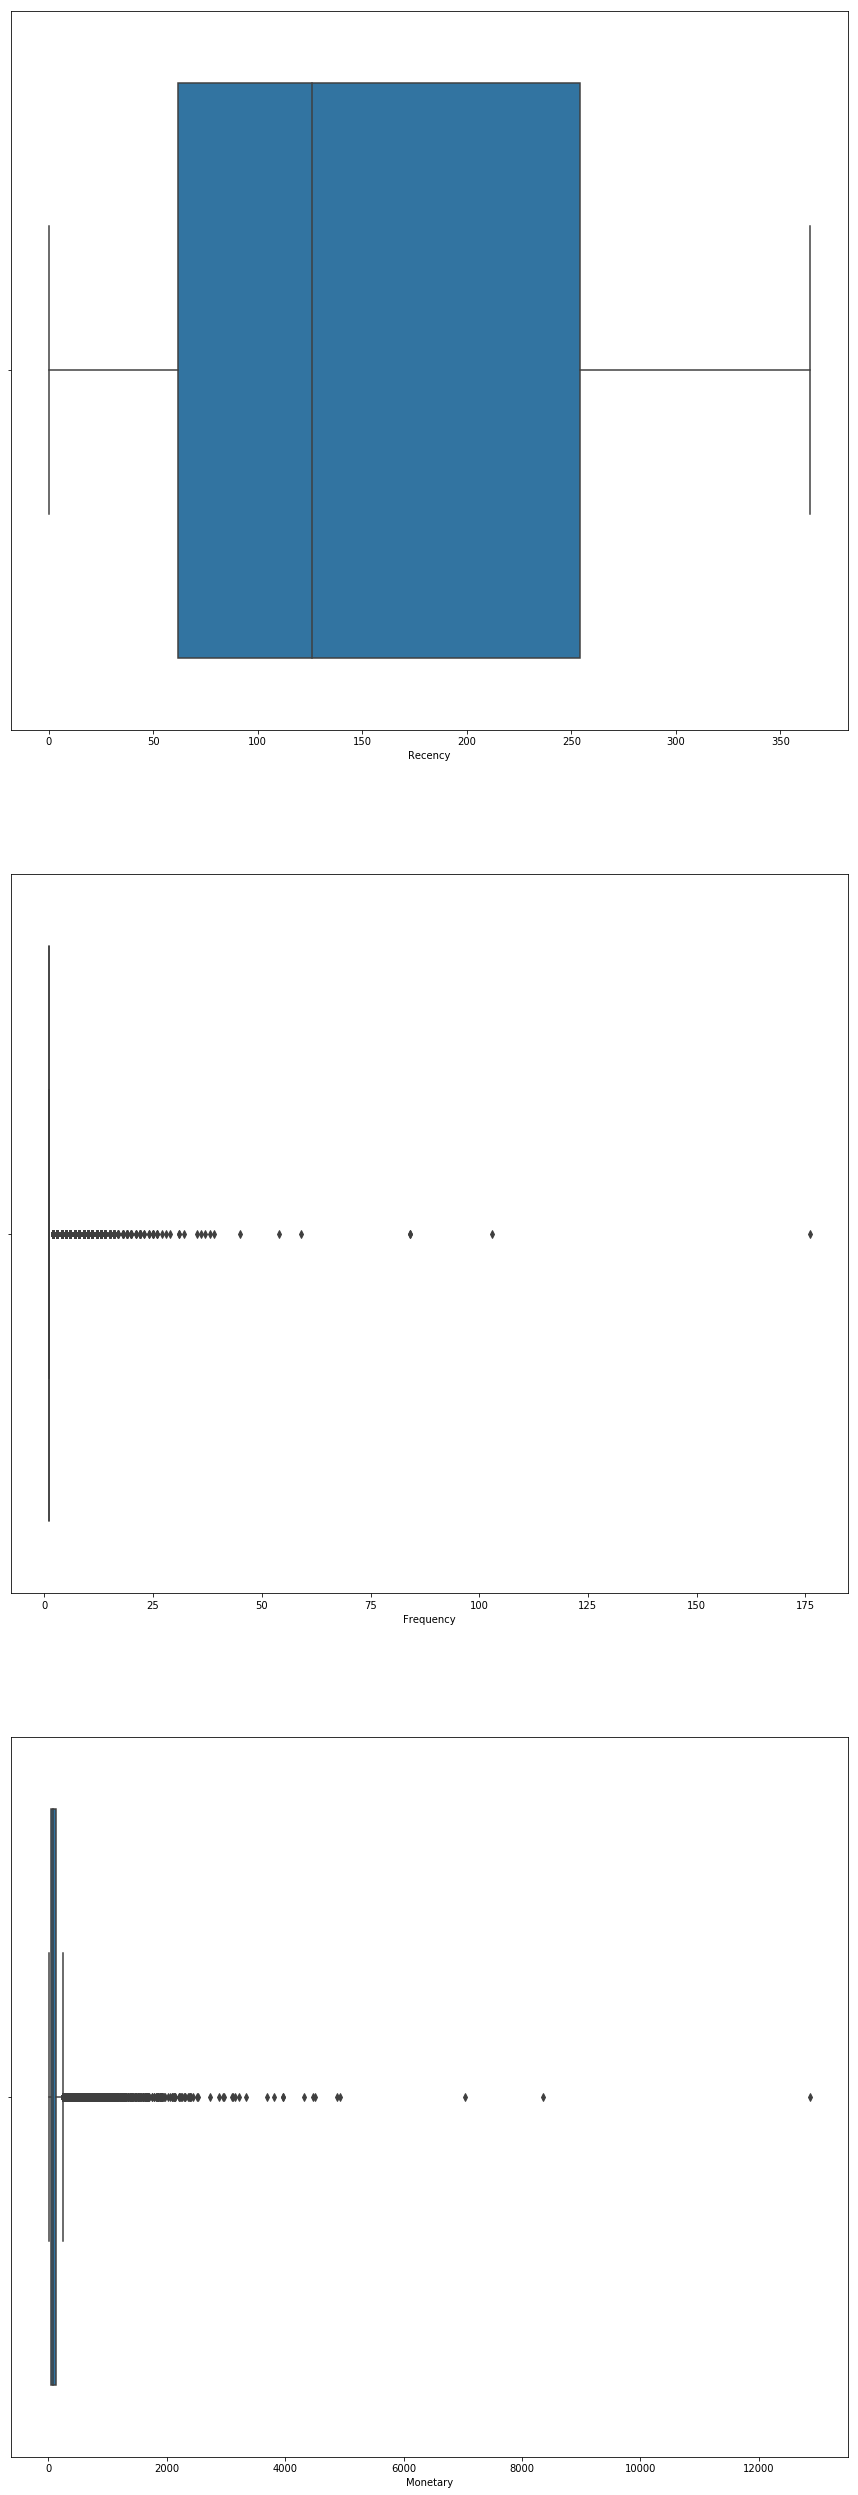

In [5]:
# 各变量箱线图 查看离群点
fig, ax=plt.subplots(3,1)
fig.set_size_inches(15,45)
sns.boxplot(rfm['Recency'], ax=ax[0])
sns.boxplot(rfm['Frequency'], ax=ax[1])
sns.boxplot(rfm['Monetary'], ax=ax[2])

In [6]:
# drop掉一些离群点
# rfm.drop(index=rfm[rfm['Monetary']>6000].index[0], axis=0, inplace=True)
# rfm.drop(index=rfm[rfm['Frequency']>80].index[0], axis=0, inplace=True)
rfm=rfm[rfm['Monetary']<=6000]
rfm=rfm[rfm['Frequency']<=80]

In [7]:
# 剔除离群点后
rfm.head(20)

,user_id,Recency,Frequency,Monetary
3,10402254,1,54,4920.59
4,20172770,2,45,4867.34
5,21966276,7,18,4497.85
6,20583030,3,39,4468.95
8,9439233,3,25,3960.09
9,16729361,22,25,3959.60
10,11983810,43,22,3803.36
11,22114857,17,35,3689.29
12,19885400,164,12,3343.90
14,21905713,226,7,3160.37


In [8]:
# 剔除离群点后 剩下114847个数
#可以看到阈值取分位数和均值的差异程度
rfm.describe() #各字段统计信息

,user_id,Recency,Frequency,Monetary
count,1.148470e+05,114847.000000,114847.000000,114847.000000
mean,1.899350e+07,155.417773,1.402971,107.248780
std,5.009856e+06,107.725450,1.173499,126.259874
min,7.638000e+03,0.000000,1.000000,7.780000
25%,1.826419e+07,62.000000,1.000000,44.480000
50%,2.187350e+07,126.000000,1.000000,71.320000
75%,2.207149e+07,254.000000,1.000000,123.360000
max,2.223546e+07,364.000000,54.000000,4920.590000


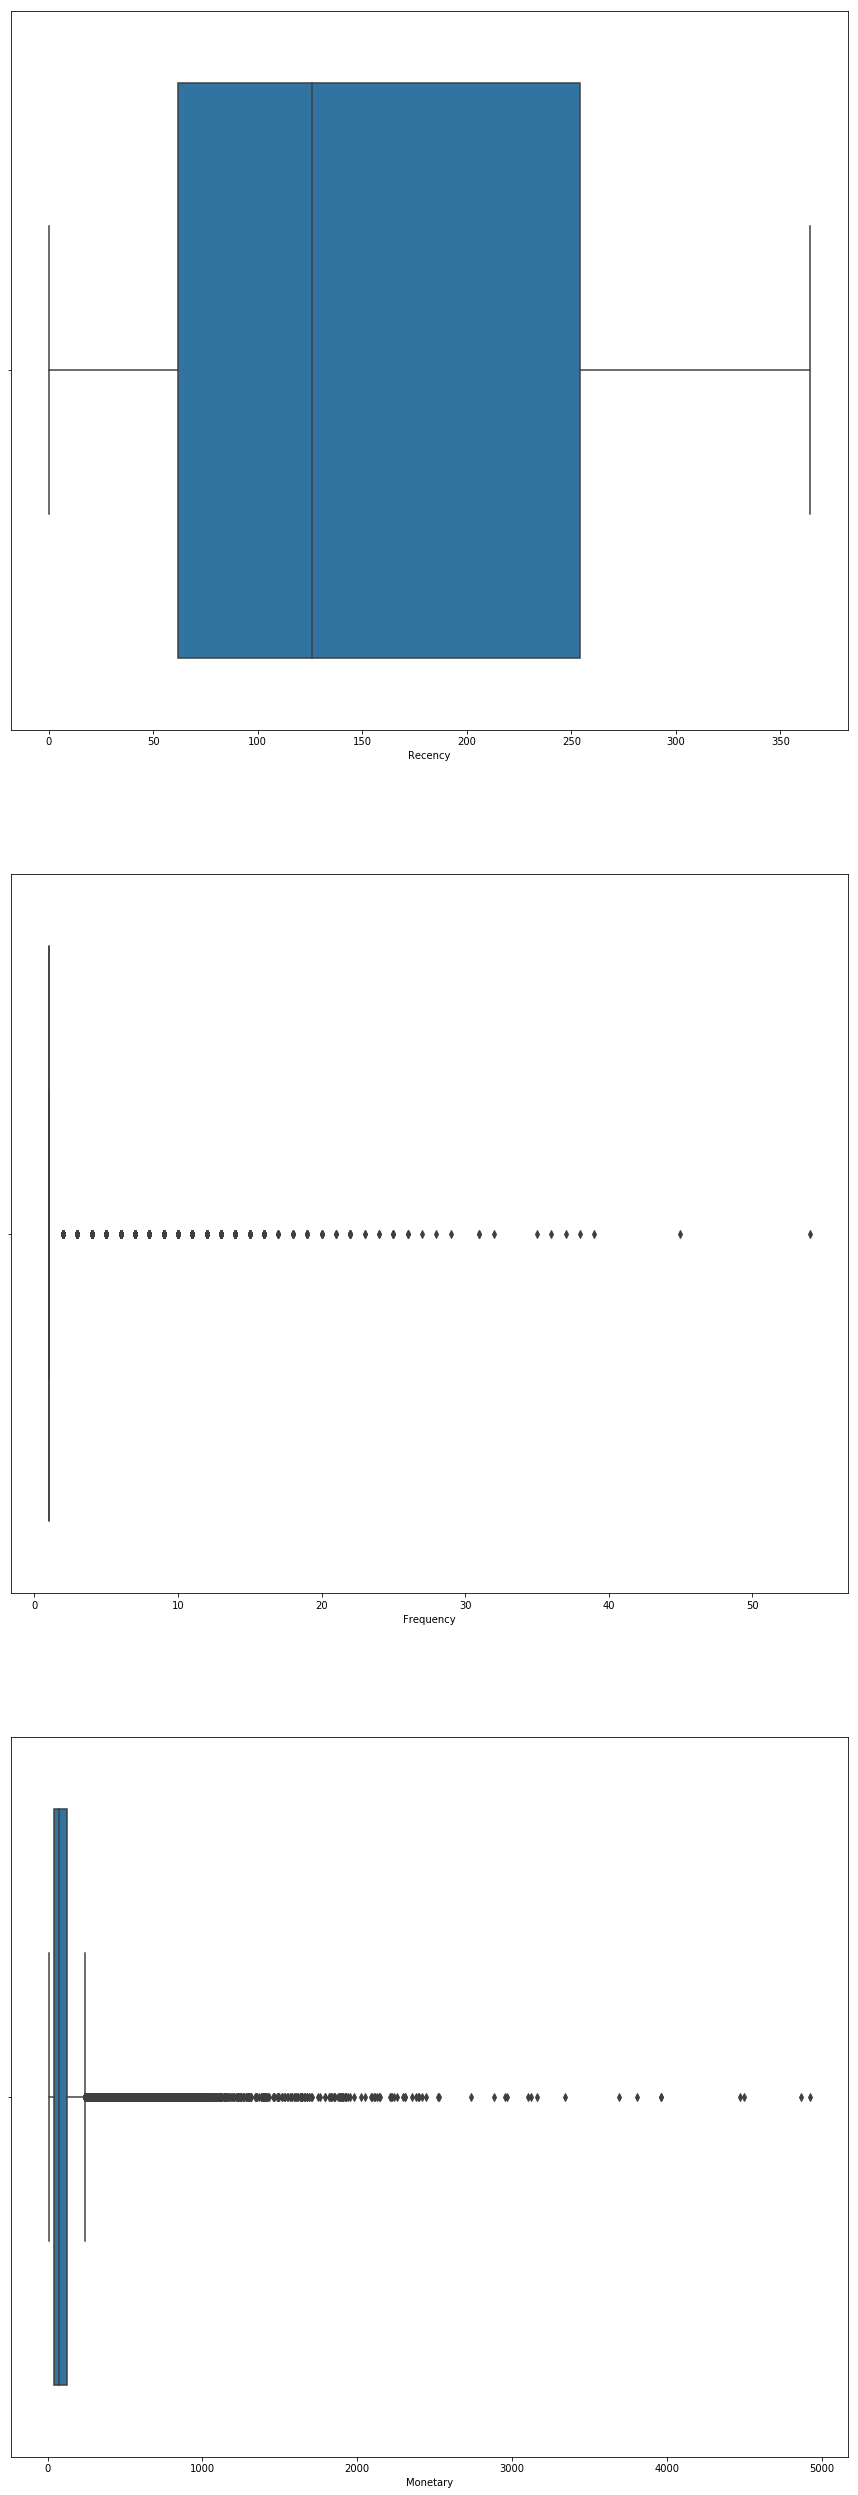

In [9]:
# 剔除离群点后
# 各变量箱线图 
fig, ax=plt.subplots(3,1)
fig.set_size_inches(15,45)
sns.boxplot(rfm['Recency'], ax=ax[0])
sns.boxplot(rfm['Frequency'], ax=ax[1])
sns.boxplot(rfm['Monetary'], ax=ax[2])

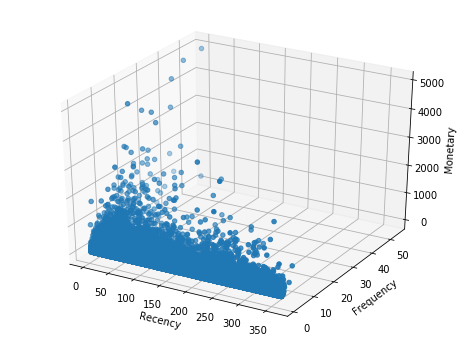

In [110]:
# 初始数据
# %matplotlib notebook  #可旋转，放大缩小。但数据量较大有延迟
# 静态图
%matplotlib inline 

fig=plt.figure()
fig.set_size_inches(8,6)
ax=fig.gca(projection='3d')
ax.scatter(rfm['Recency'],rfm['Frequency'],rfm['Monetary'])
ax.set_xlabel('Recency') # 画出坐标轴
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

plt.show()

In [10]:
# 数据标准化/归一化
# StandardScaler和MinMaxScaler：前者适用于正态分布的数据，后者适用于分布范围较稳定的数据，当新数据的加入导致max/min变化，则需重新定义；前者对outlier些许敏感，后者对outlier非常敏感

scaler=StandardScaler()
rfm_scale=scaler.fit_transform(rfm.loc[:, 'Recency':'Monetary']) #fit找出rfm的均值和标准差，transform将标准化规则运用在rfm上

rfm_scale=pd.DataFrame(rfm_scale, columns=['Recency','Frequency','Monetary'], index=rfm.index)
rfm_scale.head()

,Recency,Frequency,Monetary
3,-1.433444,44.820867,38.122659
4,-1.424162,37.151464,37.700908
5,-1.377747,14.143256,34.774471
6,-1.414879,32.038529,34.545577
8,-1.414879,20.108347,30.515301


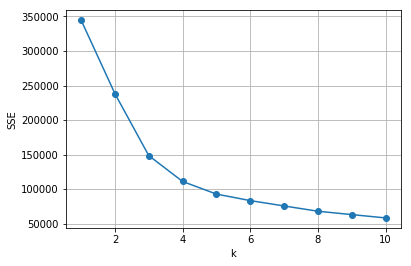

In [112]:
# 手肘法
# k值的选取，确定分为几类
SSE = [] # 存放每次结果的误差平方和
fig=plt.figure()
for k in range(1,11): 
    estimator = KMeans(n_clusters=k, random_state=360) # 构造聚类器 
    estimator.fit(rfm_scale) 
    SSE.append(estimator.inertia_)
X = range(1,11)
plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(X,SSE,'o-')
plt.grid()
plt.show()

# 图示可以看出，离群点的剔除有助于进一步缩小SSE

## k=8

In [11]:
kmodel8=KMeans(n_clusters=8, random_state=360) #k=5,分为k类。设置随机种子固定每次聚类的结果
kmodel8.fit(rfm_scale) #训练模型

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=360, tol=0.0001, verbose=0)

In [12]:
# 实际迭代次数
print(kmodel8.n_iter_)

27


In [13]:
# 查看聚类中心
center_360_8=pd.DataFrame(kmodel8.cluster_centers_, columns=['Recency','Frequency','Monetary'])
print(center_360_8)

    Recency  Frequency   Monetary
0 -0.955743  -0.280272  -0.327033
1  1.232554  -0.321811  -0.296118
2 -0.537939   2.730140   2.613651
3  0.917105   0.546733   0.799106
4 -1.112310  17.416028  16.558615
5 -0.073027  -0.288740  -0.245128
6 -0.702957   6.683489   6.347276
7 -0.813850   0.791768   0.685429


In [14]:
#统计各个类别的数目
r2 = pd.Series(kmodel8.labels_).value_counts() 
print(r2)

0    36508
1    33870
5    21993
7    11423
3     6956
2     3402
6      626
4       69
dtype: int64


In [15]:
# 获取每个样本所属的簇/类别
r3 = pd.DataFrame(kmodel8.labels_, columns=['label'], index=rfm.index)
print(r3)

       label
3          4
4          4
5          4
6          4
8          4
9          4
10         4
11         4
12         4
14         4
15         4
16         4
17         4
18         4
19         4
20         4
21         4
22         4
23         4
24         4
25         4
26         6
27         4
28         4
29         6
30         4
31         4
32         4
33         4
34         6
...      ...
14824      0
14825      5
14826      5
14827      5
14828      5
14829      5
14830      5
14831      5
14832      0
14833      5
14834      5
14835      5
14836      5
14837      5
14838      0
14839      0
14840      5
14841      5
14842      5
14843      5
14844      0
14845      5
14846      5
14847      5
14848      5
14849      5
14850      0
14851      0
14852      5
14853      0

[114847 rows x 1 columns]


In [16]:
# 得到打好标签的用户数据，可输出csv
rfm_label8 = pd.concat([rfm, r3], axis=1)
rfm_label8.head(200)

,user_id,Recency,Frequency,Monetary,label
3,10402254,1,54,4920.59,4
4,20172770,2,45,4867.34,4
5,21966276,7,18,4497.85,4
6,20583030,3,39,4468.95,4
8,9439233,3,25,3960.09,4
9,16729361,22,25,3959.60,4
10,11983810,43,22,3803.36,4
11,22114857,17,35,3689.29,4
12,19885400,164,12,3343.90,4
14,21905713,226,7,3160.37,4


<IPython.core.display.Javascript object>


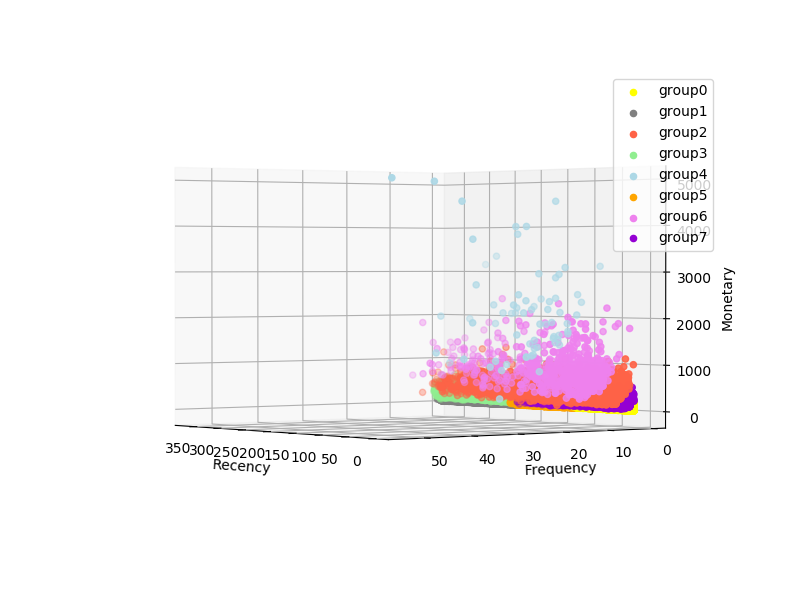

In [18]:
# 群体分层后的三维散点图,可旋转，数据量较大有延迟
%matplotlib notebook

fig=plt.figure()
fig.set_size_inches(8,6)
ax=fig.gca(projection='3d')
color=['yellow','grey','tomato','lightgreen','lightblue','orange','violet','darkviolet']
for i in range(8):
    d = rfm_label8[rfm_label8.label==i]
    ax.scatter(d['Recency'],d['Frequency'],d['Monetary'],color=color[i],label=f"group{i}")
ax.set_xlabel("Recency")
ax.set_ylabel("Frequency")
ax.set_zlabel("Monetary")
plt.legend()

### 聚类中心点还原

In [19]:
ms360=rfm.describe()[1:3].drop(['user_id'], axis=1)
ms360

,Recency,Frequency,Monetary
mean,155.417773,1.402971,107.248780
std,107.725450,1.173499,126.259874


In [20]:
center_360_8

,Recency,Frequency,Monetary
0,-0.955743,-0.280272,-0.327033
1,1.232554,-0.321811,-0.296118
2,-0.537939,2.730140,2.613651
3,0.917105,0.546733,0.799106
4,-1.112310,17.416028,16.558615
5,-0.073027,-0.288740,-0.245128
6,-0.702957,6.683489,6.347276
7,-0.813850,0.791768,0.685429


In [22]:
a=pd.DataFrame()

for i in range(3):
    a[i]=center_360_8.iloc[:,i].values*ms360.iloc[1,i]+ms360.iloc[0,i]

center_360_8_reverse=pd.DataFrame(a, index=center_360_8.index)
center_360_8_reverse.columns=['R','F','M']
center_360_8_reverse

,R,F,M
0,52.459900,1.074072,65.957671
1,288.195200,1.025326,69.860967
2,97.468083,4.606789,437.248082
3,254.213309,2.044562,208.143852
4,35.593681,21.840669,2197.937363
5,147.550920,1.064135,76.299011
6,79.691364,9.246041,908.655007
7,67.745454,2.332110,193.791017


In [23]:
kmodel8.lablecount=pd.DataFrame(pd.Series(kmodel8.labels_).value_counts() , columns=['count'])
kmodel8.lablecount

,count
0,36508
1,33870
5,21993
7,11423
3,6956
2,3402
6,626
4,69


In [24]:
# 各簇中心点、数量
center_360_8_count=pd.concat((center_360_8_reverse,kmodel8.lablecount), axis=1)
center_360_8_count.sort_values(by='count', inplace=True)
center_360_8_count=center_360_8_count.round({'R':2,'F':2,'M':2})
center_360_8_count

,R,F,M,count
4,35.59,21.84,2197.94,69
6,79.69,9.25,908.66,626
2,97.47,4.61,437.25,3402
3,254.21,2.04,208.14,6956
7,67.75,2.33,193.79,11423
5,147.55,1.06,76.30,21993
1,288.20,1.03,69.86,33870
0,52.46,1.07,65.96,36508


#### 随着k从5增大到8，后面的群体会在F、M差不多的基础上，在R上进行分割。可以进一步定位到已流失、流失中、正在流失的用户群体。
#### 例如，群体5、群体1和群体0中的大部分用户的F、M差不多，但群体1中大部分用户近一次购买距今288天，处于已流失状态；群体5中大部分用户近一次购买距今147天，处于流失中状态；群体0中大部分用户最近一次购买距今52天，处于未流失状态

In [127]:
center_360_8_count.to_csv('RFM_data/center_360_8_count')

In [126]:
rfm_label8.to_csv('RFM_data/rfm_label8')